# Explore here

It's recommended to use this notebook for exploration purposes.

In [3]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Step 1: Install dependencies
!pip install requests beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [5]:
# Step 2: Download HTML

# Fetch the HTML content of a webpage
url = "https://www.mlb.com/stats/san-francisco-giants/all-time-by-season"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Page fetched successfully!")
else:
    print(f"Failed with status code: {response.status_code}")

# Print the first 500 characters of the HTML content
print(response.text[:500])

Page fetched successfully!
<!DOCTYPE html>
<html lang="en">
<head>
        <script defer id="dd-rum">
          (() => {
            try {
              if (!window.DD_RUM) {
              (function(h, o, u, n, d) {
                h = h[d] = h[d] || {
                q: [],
                onReady: function(c) {
                  h.q.push(c)
                }
                };
                d = o.createElement(u);
                d.async = 1;
                d.src = n;
                n = o.getElementsByTagName(u)[0];


In [6]:
# Step 3: Transform the HTML
from bs4 import BeautifulSoup

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Pretty-print the first 500 characters of the parsed HTML
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script defer="" id="dd-rum">
   (() => {
            try {
              if (!window.DD_RUM) {
              (function(h, o, u, n, d) {
                h = h[d] = h[d] || {
                q: [],
                onReady: function(c) {
                  h.q.push(c)
                }
                };
                d = o.createElement(u);
                d.async = 1;
                d.src = n;
                n = o.getElementsByTagName(u)[0];
        


In [7]:
# Step 4: Process the DataFrame

# Find the table by its class name or id
table = soup.find('table', {'class': 'bui-table'})

# Find all abbr elements by class to get column labels
columns = []
for abbr in table.find_all('abbr', class_=lambda value: value and value.startswith("bui-text")):
    column_label = abbr.text.strip()
    columns.append(column_label)

print(columns)

['PLAYER', 'PLAYER', 'YEAR', 'YEAR', 'TEAM', 'TEAM', 'G', 'G', 'AB', 'AB', 'R', 'R', 'H', 'H', '2B', '2B', '3B', '3B', 'HR', 'HR', 'RBI', 'RBI', 'BB', 'BB', 'SO', 'SO', 'SB', 'SB', 'CS', 'CS', 'AVG', 'AVG', 'OBP', 'OBP', 'SLG', 'SLG', 'OPS', 'OPS']


In [8]:
# Step 4: Process the DataFrame (cont)

# OrderedDict keeps the order of our original list
from collections import OrderedDict

# Remove duplicates from original list
columns = list(OrderedDict.fromkeys(columns))
columns

['PLAYER',
 'YEAR',
 'TEAM',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'SB',
 'CS',
 'AVG',
 'OBP',
 'SLG',
 'OPS']

In [11]:
# Step 4: Process the DataFrame (cont)

# Extract table data
all_rows = []

# Get all table row tags with the data for each row
tr_tags = table.find_all('tr')

for tr in tr_tags[1:]:
    row = []
    
    # Get player name for the row
    player_span = tr.find_all('span', class_='short-IiSPVSQp')
    player_name = ' '.join(span.text for span in player_span)
    
    # Add player name to row
    row.append(player_name)
    
    # Get other row elements and append to row
    other_row_elements = [row.append(td.text.strip()) for td in tr.find_all('td')]
    
    # Append row to all_rows
    all_rows.append(row)
    
all_rows

[['B Bonds',
  '2004',
  'SF',
  '147',
  '373',
  '129',
  '135',
  '27',
  '3',
  '45',
  '101',
  '232',
  '41',
  '6',
  '1',
  '.362',
  '.609',
  '.812',
  '1.421'],
 ['B Bonds',
  '2002',
  'SF',
  '143',
  '403',
  '117',
  '149',
  '31',
  '2',
  '46',
  '110',
  '198',
  '47',
  '9',
  '2',
  '.370',
  '.582',
  '.799',
  '1.381'],
 ['B Bonds',
  '2001',
  'SF',
  '153',
  '476',
  '129',
  '156',
  '32',
  '2',
  '73',
  '137',
  '177',
  '93',
  '13',
  '3',
  '.328',
  '.515',
  '.863',
  '1.378'],
 ['B Bonds',
  '2003',
  'SF',
  '130',
  '390',
  '111',
  '133',
  '22',
  '1',
  '45',
  '90',
  '148',
  '58',
  '7',
  '0',
  '.341',
  '.529',
  '.749',
  '1.278'],
 ['B Bonds',
  '1993',
  'SF',
  '159',
  '539',
  '129',
  '181',
  '38',
  '4',
  '46',
  '123',
  '126',
  '79',
  '29',
  '12',
  '.336',
  '.458',
  '.677',
  '1.135'],
 ['B Bonds',
  '2000',
  'SF',
  '143',
  '480',
  '129',
  '147',
  '28',
  '4',
  '49',
  '106',
  '117',
  '77',
  '11',
  '3',
  '.306

In [12]:
# Step 4: Process the DataFrame (cont)
import pandas as pd 

# Create DataFrame
df = pd.DataFrame(all_rows, columns=columns)

# Display DataFrame
df.head()

,PLAYER,YEAR,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,B Bonds,2004,SF,147,373,129,135,27,3,45,101,232,41,6,1,.362,.609,.812,1.421
1,B Bonds,2002,SF,143,403,117,149,31,2,46,110,198,47,9,2,.370,.582,.799,1.381
2,B Bonds,2001,SF,153,476,129,156,32,2,73,137,177,93,13,3,.328,.515,.863,1.378
3,B Bonds,2003,SF,130,390,111,133,22,1,45,90,148,58,7,0,.341,.529,.749,1.278
4,B Bonds,1993,SF,159,539,129,181,38,4,46,123,126,79,29,12,.336,.458,.677,1.135


In [37]:
# Step 4: Process the DataFrame (cont)
ab_ops = df[["AB", "HR"]]
ab_ops.head()

,AB,HR
0,373,45
1,403,46
2,476,73
3,390,45
4,539,46


In [38]:
# Step 5: Store the data in sqlite
import sqlite3

connection = sqlite3.connect("ab_hr.db")
connection

In [39]:
# Step 5: Store the data in sqlite (cont)
cursor = connection.cursor()
cursor.execute("""CREATE TABLE ab_hr (AB, HR)""")

In [40]:
# Step 5: Store the data in sqlite (cont)
ab_hr_tuples = list(ab_ops.to_records(index = False))
ab_hr_tuples[:5]

[np.record(('373', '45'), dtype=[('AB', 'O'), ('HR', 'O')]),
 np.record(('403', '46'), dtype=[('AB', 'O'), ('HR', 'O')]),
 np.record(('476', '73'), dtype=[('AB', 'O'), ('HR', 'O')]),
 np.record(('390', '45'), dtype=[('AB', 'O'), ('HR', 'O')]),
 np.record(('539', '46'), dtype=[('AB', 'O'), ('HR', 'O')])]

In [41]:
# Step 5: Store the data in sqlite (cont)
cursor.executemany("INSERT INTO ab_hr VALUES (?,?)", ab_hr_tuples)
connection.commit()

In [42]:
# Step 5: Store the data in sqlite (cont)

# Check the data from the database
for row in cursor.execute("SELECT * FROM ab_hr"):
    print(row)

('373', '45')
('403', '46')
('476', '73')
('390', '45')
('539', '46')
('480', '49')
('491', '45')
('545', '42')
('565', '41')
('517', '42')
('391', '37')
('633', '23')
('580', '51')
('495', '39')
('552', '37')
('558', '52')
('534', '33')
('521', '25')
('568', '26')
('585', '35')
('532', '40')
('396', '27')
('527', '36')
('566', '38')
('543', '47')


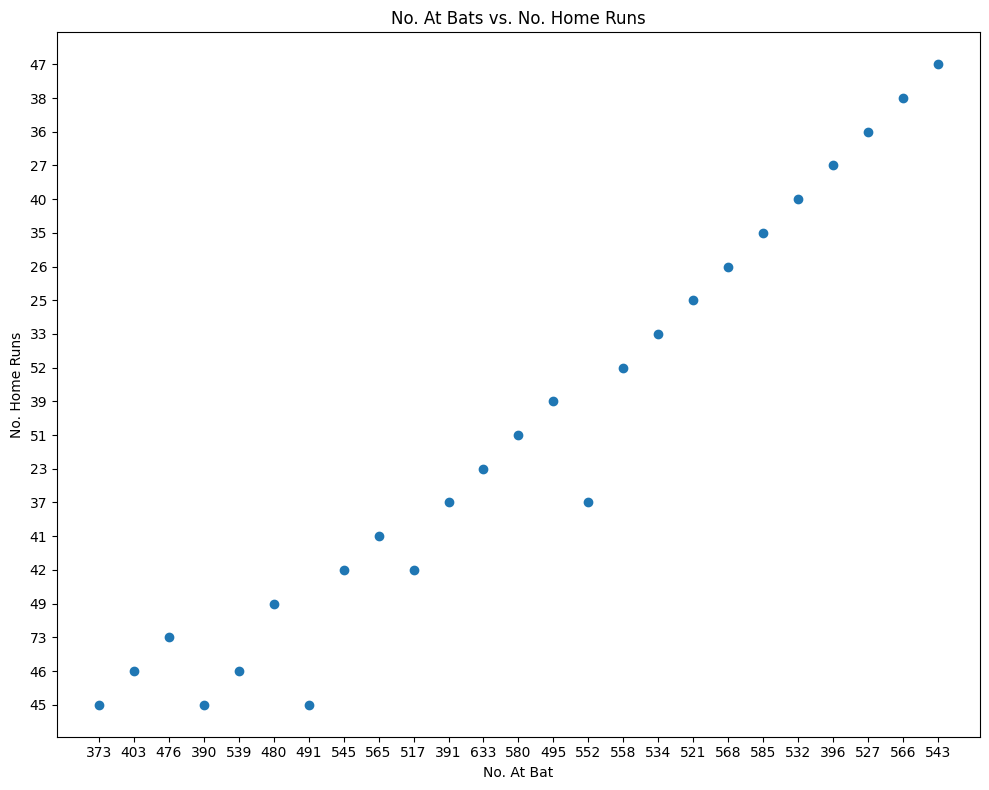

In [45]:
# Step 6: Visualize the data
x = ab_ops.AB
y = ab_ops.HR
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xlabel("No. At Bat")
plt.ylabel("No. Home Runs")
plt.title("No. At Bats vs. No. Home Runs")

plt.tight_layout()